In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_excel("./data/mpg.xlsx", index_col = 'id')

In [4]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- 연습문제 1

In [11]:
s1 = df['manufacturer'].value_counts()
s1.head()

dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
Name: manufacturer, dtype: int64

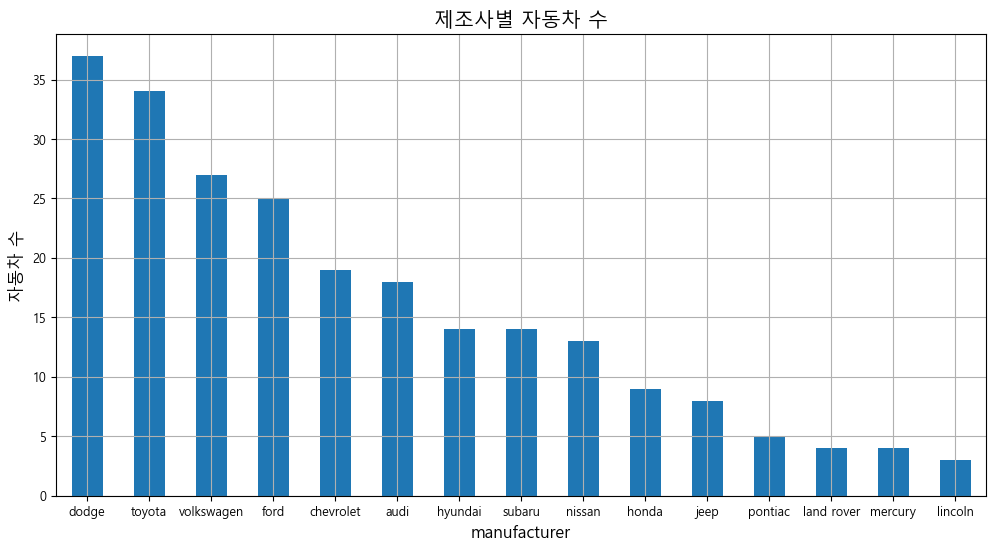

In [165]:
s1.plot.bar(rot = 0, figsize = (12, 6), fontsize = 9)
plt.title("제조사별 자동차 수")
plt.ylabel("자동차 수")
plt.xlabel("manufacturer")
plt.grid()
plt.savefig("./img/1.png", dpi = 200, bbox_inches = 'tight')
plt.show()

- 연습문제 2

In [47]:
s2 = pd.crosstab(df['manufacturer'], df['year'])
s2.reset_index(inplace = True)

In [48]:
s2.head()

year,manufacturer,1999,2008
0,audi,9,9
1,chevrolet,7,12
2,dodge,16,21
3,ford,15,10
4,honda,5,4


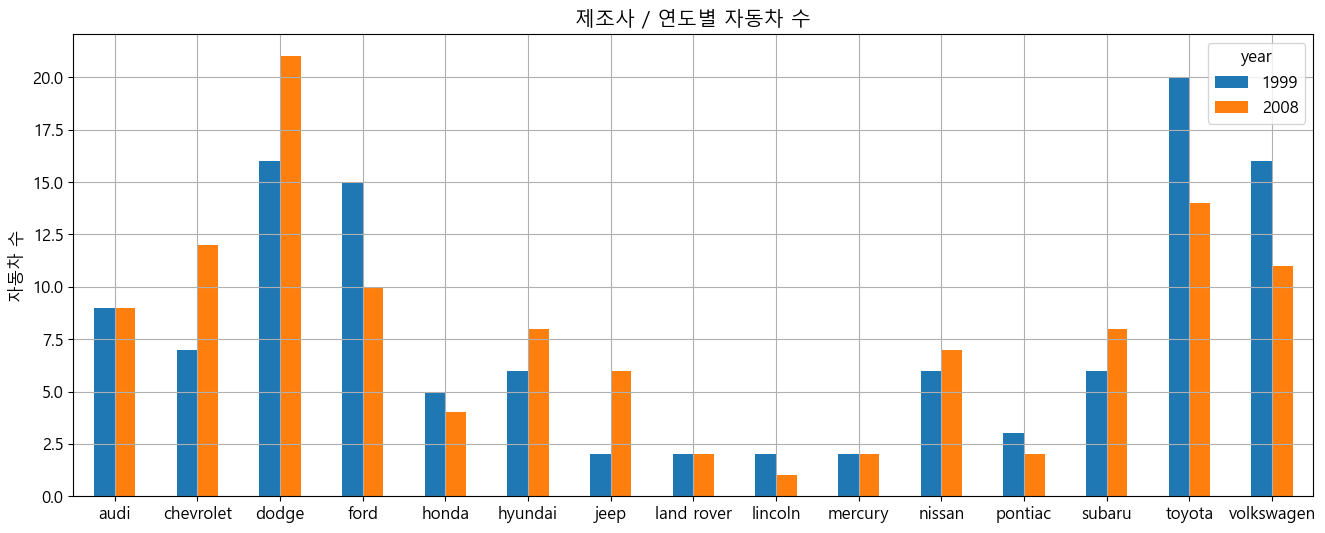

In [166]:
s2[[1999, 2008]].plot.bar(rot = 0, figsize = (16, 6))
plt.title("제조사 / 연도별 자동차 수")
plt.xticks(range(0, len(s2)), s2['manufacturer'])
plt.ylabel("자동차 수")
plt.grid()
plt.savefig("./img/2.png", dpi = 200, bbox_inches = 'tight')
plt.show()

- 연습문제 3

In [61]:
s3 = df['drv'].value_counts()

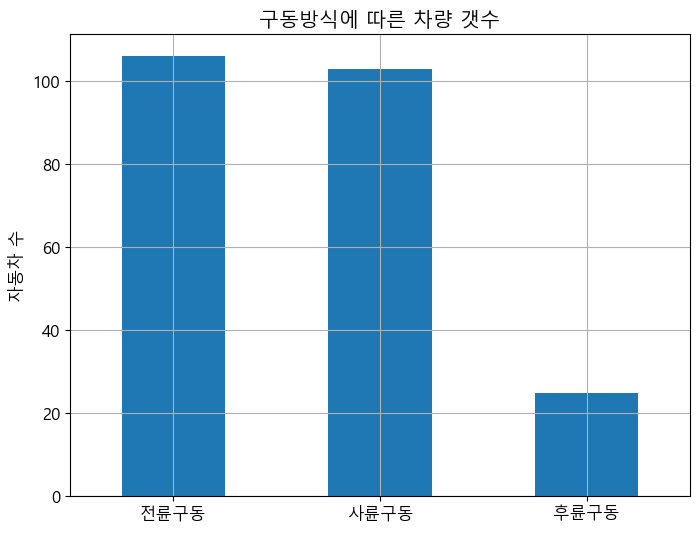

In [167]:
s3.plot.bar(rot = 0)
plt.title("구동방식에 따른 차량 갯수")
plt.xticks([0, 1, 2], ["전륜구동", "사륜구동", "후륜구동"])
plt.grid()
plt.ylabel("자동차 수")
plt.savefig("./img/3.png", dpi = 200, bbox_inches = 'tight')
plt.show()

- 연습문제 4

In [71]:
s4 = df.groupby("drv").mean(numeric_only = True)

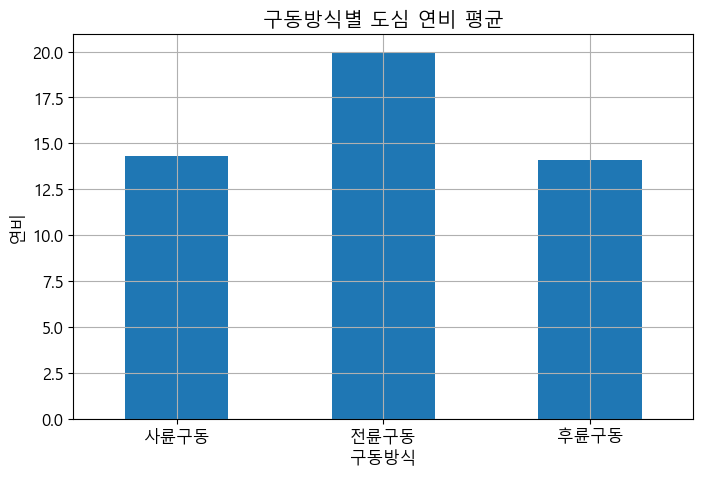

In [168]:
s4['cty'].plot.bar(rot = 0, figsize = (8, 5))
plt.title("구동방식별 도심 연비 평균")
plt.xlabel("구동방식")
plt.xticks([0, 1, 2], ["사륜구동", "전륜구동", "후륜구동"])
plt.ylabel("연비")
plt.grid()
plt.savefig("./img/4.png", dpi = 200, bbox_inches = 'tight')
plt.show()

- 연습문제 5

In [89]:
s5 = df.groupby("manufacturer").mean(numeric_only = True)
s5.head()

,displ,year,cyl,cty,hwy
manufacturer,,,,,
audi,2.544444,2003.500000,5.222222,17.611111,26.444444
chevrolet,5.063158,2004.684211,7.263158,15.000000,21.894737
dodge,4.378378,2004.108108,7.081081,13.135135,17.945946
ford,4.536000,2002.600000,7.200000,14.000000,19.360000
honda,1.711111,2003.000000,4.000000,24.444444,32.555556


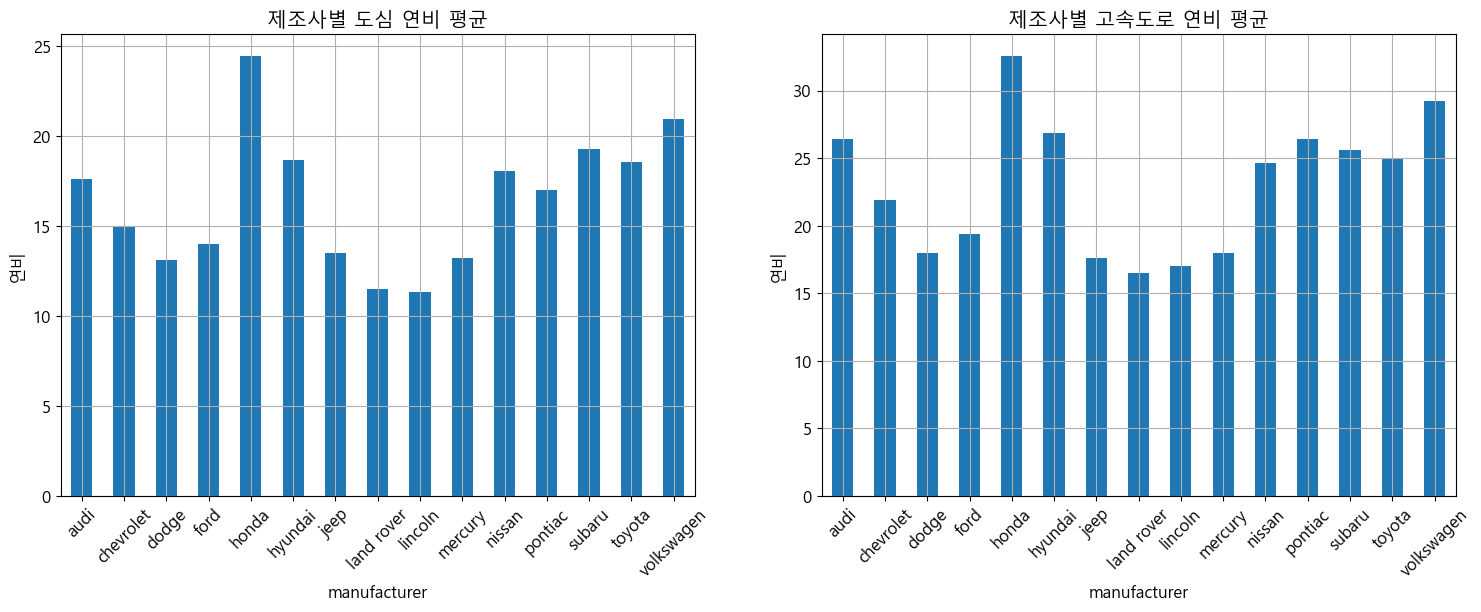

In [170]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
ax[0].set_title("제조사별 도심 연비 평균")
ax[1].set_title("제조사별 고속도로 연비 평균")
s5['cty'].plot.bar(ax = ax[0], rot = 45)
s5['hwy'].plot.bar(ax = ax[1], rot = 45)
ax[0].set_ylabel("연비")
ax[1].set_ylabel("연비")
ax[0].grid()
ax[1].grid()
plt.savefig("./img/5.png", dpi = 200, bbox_inches = 'tight')
plt.show()

- 연습문제 6

In [110]:
z1 = np.polyfit(df['displ'], df['cty'], 1)
z2 = np.polyfit(df['displ'], df['hwy'], 1)

In [113]:
f1 = np.poly1d(z1)
f2 = np.poly1d(z2)

y1 = f1(df['displ'])
y2 = f2(df['displ'])

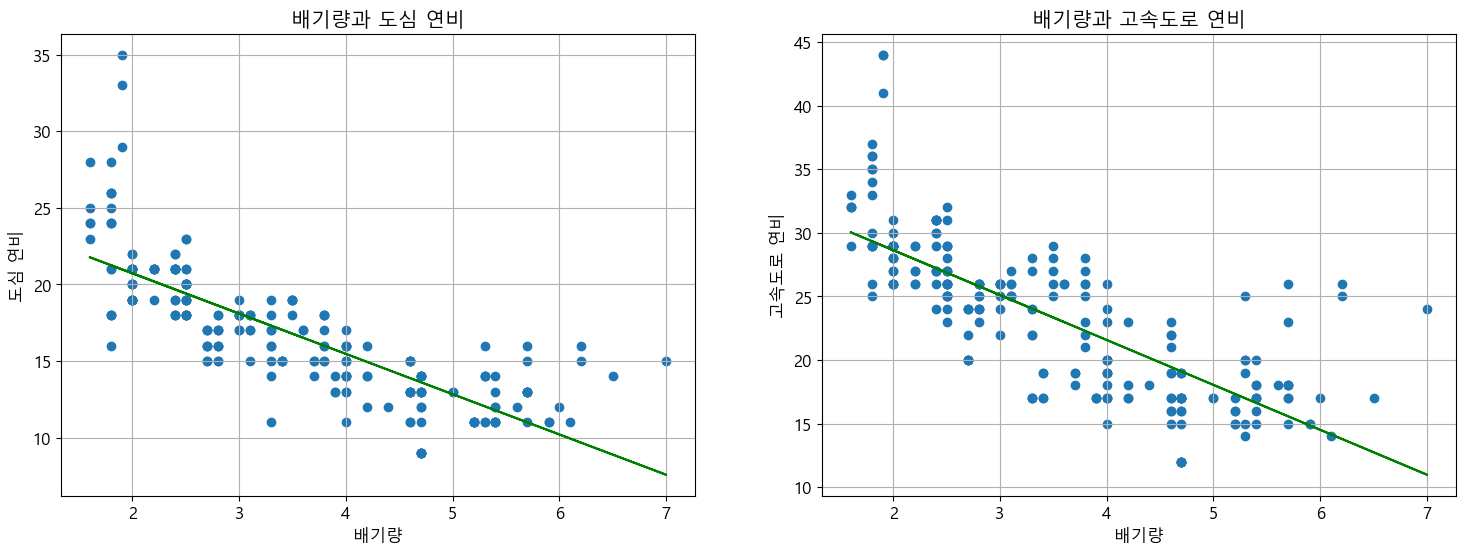

In [179]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
ax[0].set_title("배기량과 도심 연비")
ax[1].set_title("배기량과 고속도로 연비")
ax[0].scatter(df['displ'], df['cty'])
ax[0].plot(df['displ'], y1, color = "green")
ax[1].scatter(df['displ'], df['hwy'])
ax[1].plot(df['displ'], y2, color = "green")
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel("도심 연비")
ax[1].set_ylabel("고속도로 연비")
ax[0].set_xlabel("배기량")
ax[1].set_xlabel("배기량")
plt.savefig("./img/6.png", dpi = 200, bbox_inches = 'tight')
plt.show()

- 연습문제 7

In [125]:
df['avg'] = np.average(df[['cty', 'hwy']], axis = 1)
avg = df['avg'].mean()
avg

20.14957264957265

In [130]:
df['passfail'] = df['avg'] > avg
df['passfail'] = df['passfail'].replace({True : "pass", False : "fali"})

In [135]:
s7 = df[df['passfail'] == 'pass'].sort_values('avg',ascending = False)
s7.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg,passfail
id,,,,,,,,,,,,,
222,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,pass
213,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,pass
223,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,pass
197,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,pass
196,toyota,corolla,1.8,1999,4,manual(m5),f,26,35,r,compact,30.5,pass


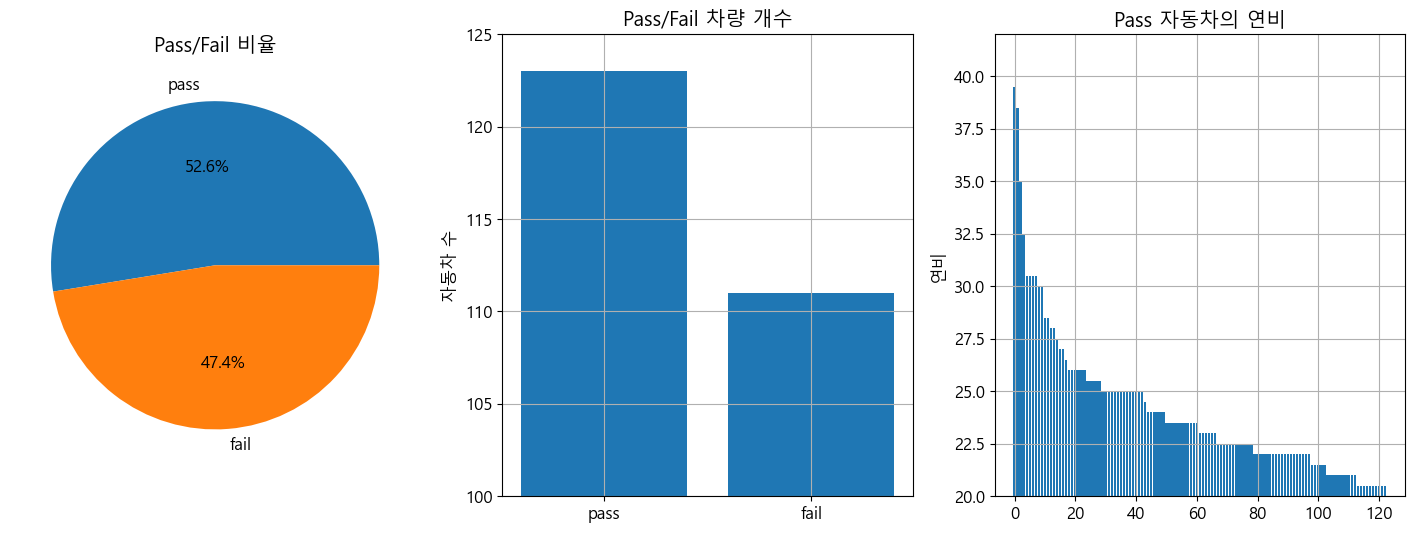

In [173]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].set_title("Pass/Fail 비율")
ax[0].pie(df['passfail'].value_counts(), autopct='%0.1f%%', labels = ['pass', 'fail'])
ax[1].set_title("Pass/Fail 차량 개수")
ax[1].bar(['pass', 'fail'], df['passfail'].value_counts())
ax[1].set_ylim(100, 125)
ax[2].set_title("Pass 자동차의 연비")
ax[2].bar(range(0, len(s7)), s7['avg'])
ax[2].set_ylim(20, 42)
ax[1].grid()
ax[2].grid()
ax[1].set_ylabel("자동차 수")
ax[2].set_ylabel("연비")
plt.savefig("./img/7.png", dpi = 200, bbox_inches = 'tight')
plt.show()

In [240]:
s7.groupby('model').mean(numeric_only = True).sort_values('avg', ascending = False)

,displ,year,cyl,cty,hwy,avg
model,,,,,,
corolla,1.800000,2002.600000,4.000000,25.600000,34.000000,29.800000
civic,1.711111,2003.000000,4.000000,24.444444,32.555556,28.500000
new beetle,2.133333,2002.000000,4.333333,24.000000,32.833333,28.416667
jetta,2.212500,2003.500000,4.500000,21.875000,29.875000,25.875000
altima,2.800000,2005.000000,4.666667,20.666667,28.666667,24.666667
camry,2.671429,2002.857143,4.857143,19.857143,28.285714,24.071429
camry solara,2.642857,2002.857143,4.857143,19.857143,28.142857,24.000000
gti,2.160000,2002.600000,4.400000,20.000000,27.400000,23.700000
a4,2.328571,2002.857143,4.857143,18.857143,28.285714,23.571429


In [242]:
from matplotlib.gridspec import GridSpec

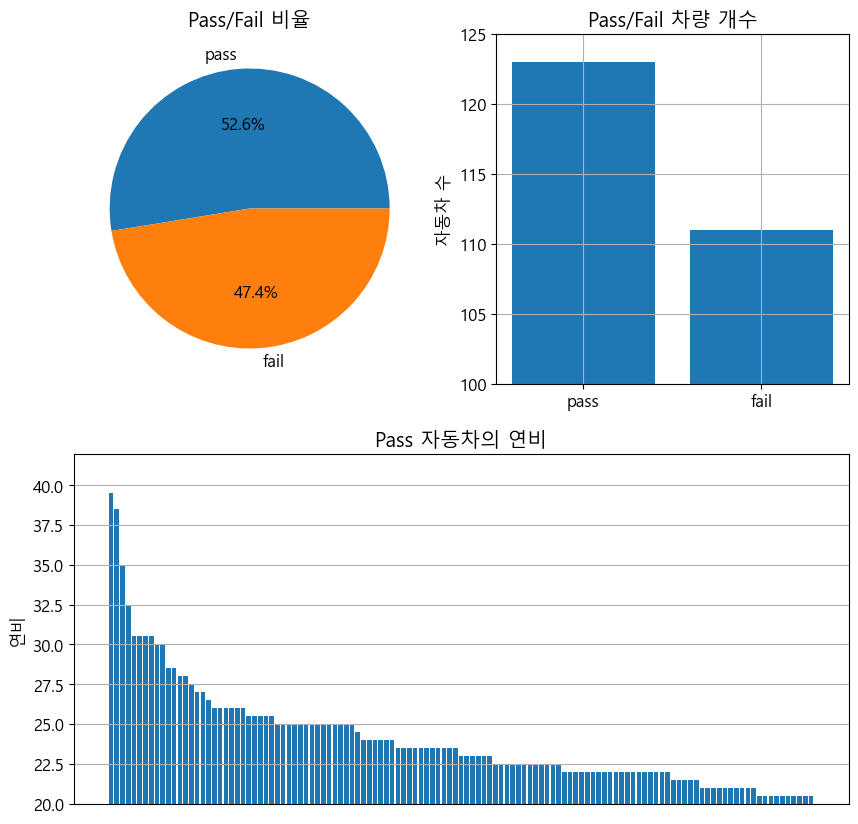

In [255]:
gs = GridSpec(2, 2)
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

ax1.set_title("Pass/Fail 비율")
ax1.pie(df['passfail'].value_counts(), autopct='%0.1f%%', labels = ['pass', 'fail'])
ax2.set_title("Pass/Fail 차량 개수")
ax2.bar(['pass', 'fail'], df['passfail'].value_counts())
ax2.set_ylim(100, 125)
ax3.set_title("Pass 자동차의 연비")
ax3.bar(range(0, len(s7)), s7['avg'])
ax3.set_ylim(20, 42)
ax2.grid()
ax3.grid()
ax2.set_ylabel("자동차 수")
ax3.set_ylabel("연비")
ax3.set_xticks([])
plt.show()